In [30]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.io
from scipy import special

In [82]:
#We will now implement l2 regularized logistic regression

#Load data

pre_data = scipy.io.loadmat('data.mat')
pre_data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Fri Feb 23 17:22:16 2024',
 '__version__': '1.0',
 '__globals__': [],
 'y': array([[1.],
        [0.],
        [1.],
        ...,
        [0.],
        [0.],
        [0.]]),
 'X': array([[ 8.6 ,  0.42,  0.39, ...,  0.69, 11.7 ,  0.8 ],
        [ 8.2 ,  0.3 ,  0.44, ...,  0.33, 12.  ,  0.6 ],
        [10.8 ,  0.32,  0.44, ...,  0.78, 10.  ,  0.6 ],
        ...,
        [ 6.2 ,  0.28,  0.33, ...,  0.5 , 12.1 ,  0.6 ],
        [ 6.1 ,  0.41,  0.24, ...,  0.5 , 10.4 ,  0.6 ],
        [ 7.3 ,  0.19,  0.68, ...,  0.64,  9.4 ,  0.6 ]]),
 'description': array(['fixed acidity       ', 'volatile acidity    ',
        'citric acid         ', 'residual sugar      ',
        'chlorides           ', 'free sulfur dioxide ',
        'total sulfur dioxide', 'density             ',
        'pH                  ', 'sulphates           ',
        'alcohol             ', 'quality             '], dtype='<U20'),
 'X_test': array([[ 6.5 ,  0.18

In [118]:
#First normalize all features to have zero mean and unit stdev

data = (pre_data['X']-np.mean(pre_data['X'],0))/np.std(pre_data['X'],0)

#Add fictitious dimension for affine parameter

data = np.vstack((data.T,1+np.zeros(5000))).T

In [254]:
#Note the data is already shuffled. Let's pick a training and validation set:

y_training = pre_data['y'][:4000]
y_val = pre_data['y'][4000:]
y_val = np.reshape(y_val,1000)

X_training = data[:4000]
X_val = data[4000:]

In [229]:
#Let's do the regression with batch gradient descent first:

def s(v):
    return special.expit(v)

def train(size,n_iterations,step_size,reg_param):
    
    w = np.zeros(13)
    y_temp = np.reshape(y_training[:size],size)
    
    for i in range(n_iterations):
        temp = y_temp - s(np.matmul(X_training[:size],w))
        w += w + step_size * (np.matmul(X_training[:size].T, temp) - 2 * reg_param * w)
    return w

def loss(i, weights):
    reg_prob = np.max([s(np.matmul(X_training[i],weights)),10**-5])
    reg_prob2 = np.max([1-s(np.matmul(X_training[i],weights)),10**-5])
    return y_training[i][0] * np.log(reg_prob) + (1-y_training[i][0]) * np.log(reg_prob2)
    

def cost(size,n_iterations,step_size,reg_param):
    
    c = 0
    weights = train(size,n_iterations,step_size,reg_param)
    
    for i in range(4000):
        c -= loss(int(i),weights)
    return c
        

In [230]:
#Cost as a function of number of gradient descent iterations
n_iters = [10,100,1000,2000,5000]
cost_vec = [cost(4000,j,0.1,5.5) for j in n_iters]

Text(0, 0.5, 'Cost')

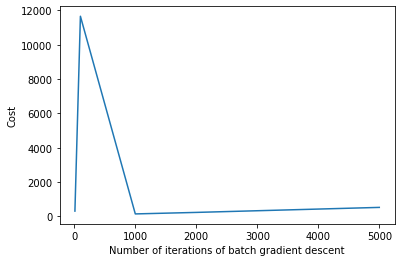

In [231]:
plt.plot(n_iters,cost_vec)
plt.xlabel('Number of iterations of batch gradient descent')
plt.ylabel('Cost')

In [232]:
#Let's now implement stochastic gradient descent instead

def train_stochastic(n_iterations,step_size,reg_param):
    
    w = np.zeros(13)
    y_temp = np.reshape(y_training,4000)
    
    for i in range(n_iterations):
        temp = y_temp[i] - s(np.matmul(X_training[i],w))
        w += w + step_size * (X_training[i]*temp - 2 * reg_param * w)
    return w

def cost_stochastic(n_iterations,step_size,reg_param):
    
    c = 0
    weights = train_stochastic(n_iterations,step_size,reg_param)
    
    for i in range(4000):
        c -= loss(int(i),weights)
    return c
        

In [233]:
#Cost as a function of number of gradient descent iterations
n_iters_stoc = [10,100,1000,1500,2000,2500,3000,3500]
cost_vec_stoc = [cost_stochastic(j,0.1,5.5) for j in n_iters_stoc]

Text(0, 0.5, 'Cost')

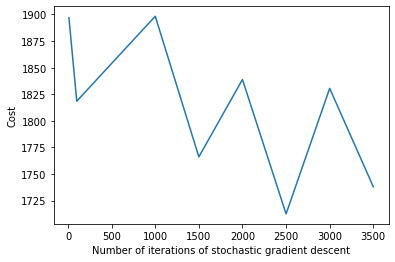

In [234]:
plt.plot(n_iters_stoc,cost_vec_stoc)
plt.xlabel('Number of iterations of stochastic gradient descent')
plt.ylabel('Cost')

In [235]:
#SGD with a variable step size now

def train_stochastic2(n_iterations,step_size,reg_param):
    
    w = np.zeros(13)
    y_temp = np.reshape(y_training,4000)
    
    for i in range(n_iterations):
        temp = y_temp[i] - s(np.matmul(X_training[i],w))
        w += w + step_size/(i+1) * (X_training[i]*temp - 2 * reg_param * w)
    return w

def cost_stochastic2(n_iterations,step_size,reg_param):
    
    c = 0
    weights = train_stochastic2(n_iterations,step_size,reg_param)
    
    for i in range(4000):
        c -= loss(int(i),weights)
    return c
        

In [277]:
#Cost as a function of number of gradient descent iterations
n_iters_stoc2 = [10,100,200,300,500,1000]
cost_vec_stoc2 = [cost_stochastic2(j,10,1.5) for j in n_iters_stoc2]

Text(0, 0.5, 'Cost')

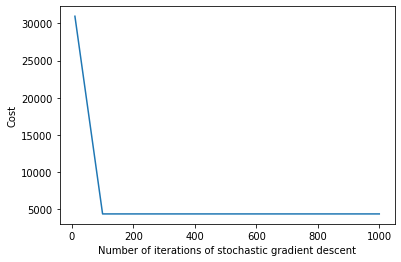

In [278]:
plt.plot(n_iters_stoc2,cost_vec_stoc2)
plt.xlabel('Number of iterations of stochastic gradient descent')
plt.ylabel('Cost')

In [282]:
#Check performance on validation set:

best_weights = train_stochastic2(1000,10,1.5)
preds = s(np.matmul(X_val,best_weights))

acc = np.sum(np.abs(preds-y_val))
print("Validation accuracy is", acc, '%')

Validation accuracy is 90.0 %
